# Получение данных

## Импорт

In [ ]:
#!pip install vk

In [2]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
import vk
import json

## Инициализация сессии

In [4]:
import vk_api

session = vk_api.VkApi(token='vk1.a.BNFRxciCHEFJOO1GMaGmZRyGGoG8qdYRDAj78uYPDz3igpc31szFBM1AM1Vl7tOB6BhdhyErSvxl014xNOLRbwGYaCyjbydVOWlaMB7dWslSkADQ21RtU1U-hgPjR5DXtOUS-Y3aLw2EOwJf33Q93cvXXwMDX07MILmpvdFItSbmD2LbASBSW2_TZvvig1KFvzZYenWYp7fbiJEg33NBlQ')
vk = session.get_api()

## Получение списка друзей

In [5]:
friends = vk.friends.get()
print('Количество друзей:', friends['count'])

Количество друзей: 154


In [6]:
friends_ids_list = ",".join([str(i) for i in friends["items"]])
fields_name = ",".join([
                        "id","first_name","last_name","sex","bdate","country","home_town","has_mobile","followers_count","schools","common_count","universities","personal"
               #'first_name', 'last_name', 'id', 'sex', 'bdate', 'country',
               #'home_town', 'has_mobile', 'followers_count', 'common_count', 
               #'is_closed', 'can_access_closed', 'can_see_audio',
               #'online', 'city', 'can_post',
               #'can_write_private_message', 'can_see_all_posts',
               #'contacts', 'status', 'relation', 'universities',
               #'deactivated', 'counters', 'has_photo',
               #'occupation', 'site', 'wall_default'
              ])
friends_ids_list

'3113047,6097193,6745477,13570931,13773013,15153851,16352409,16838129,21753002,26572932,32600403,44019205,46245192,47603955,50128499,50597688,52023924,53628259,57558027,59432344,60554889,64582245,68528340,72645079,72711330,72893882,75010505,75262609,76215722,76524880,77315640,78043806,80840593,82863319,87246730,91634354,92619999,94074424,94797654,100030077,100846951,102323796,106735360,107765980,110106760,110722123,111067762,112562242,113217882,115520542,119024220,122679376,123934455,128436472,133422076,134509275,135503092,135571341,135686212,136934867,139416067,140376593,140736637,142331757,142604925,142971527,144180142,145155804,146500340,147364327,147536745,147939613,148394178,149199634,150664755,151444714,152583916,153814091,154502158,156393998,157572602,157698385,160042263,161897343,162945962,165080216,166311975,166682683,167849329,174340961,175451088,179444664,180398453,180684417,181397929,184531768,184651972,186100913,187262196,188451724,189092168,191073519,192594644,195593877,2

In [7]:
dr = vk.users.get(user_ids = friends_ids_list, fields = fields_name)

## Донабор из друзей друзей

In [8]:
dr_dr=[]
tdr=iter(dr)
while True:
  user = next(tdr)
  dr_dr.extend(vk.friends.get(user_id = user["id"])['items'])
  if len(dr)+len(dr_dr)<300:
    time.sleep(1)
  else:
    break
len(dr_dr)

614

In [9]:
m=friends["items"]
m.extend(dr_dr)
m=m[:400]
friends_ids_list=",".join([str(i) for i in m])

In [10]:
dr=vk.users.get(user_ids = friends_ids_list, fields = fields_name)

In [11]:
len(dr)

400

In [12]:
df=pd.DataFrame(dr)
df

,id,bdate,country,has_mobile,followers_count,common_count,home_town,personal,universities,schools,sex,first_name,last_name,can_access_closed,is_closed,deactivated
0,3113047,28.4.1991,"{'id': 1, 'title': 'Россия'}",1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN
1,6097193,NaN,"{'id': 1, 'title': 'Россия'}",1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN
2,6745477,26.9.1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted
3,13570931,2.11.1994,"{'id': 1, 'title': 'Россия'}",1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN
4,13773013,NaN,"{'id': 1, 'title': 'Россия'}",1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,1.6.1989,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN
396,9658196,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN
397,9670156,NaN,"{'id': 65, 'title': 'Германия'}",1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN
398,9670929,NaN,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN


In [13]:
df["Группы"]=None
k=0
for i in df["id"]:
  try:
    t=vk.groups.get(user_id = i, extended = 1, fields = ",".join(["description","activity"]))
    df.loc[df["id"] == i,"Группы"] = json.dumps(t["items"])
  except:
    df.loc[df["id"] == i,"Группы"] = None
  k+=1
  if k%10 == 0:
    print(k)
  time.sleep(0.3)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


In [14]:
df["Подписки"]=None
k=0
for i in df["id"]:
  try:
    t=vk.users.getSubscriptions(user_id = i, extended = 1, fields = ",".join(["description","activity"]))
    df.loc[df["id"] == i,"Подписки"] = json.dumps(t["items"])
  except:
    df.loc[df["id"] == i,"Подписки"] = None
  k+=1
  if k%10 == 0:
    print(k)
  time.sleep(0.3)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


In [15]:
df

,id,bdate,country,has_mobile,followers_count,common_count,home_town,personal,universities,schools,sex,first_name,last_name,can_access_closed,is_closed,deactivated,Группы,Подписки
0,3113047,28.4.1991,"{'id': 1, 'title': 'Россия'}",1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,NaN,"{'id': 1, 'title': 'Россия'}",1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,26.9.1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,None,None
3,13570931,2.11.1994,"{'id': 1, 'title': 'Россия'}",1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,NaN,"{'id': 1, 'title': 'Россия'}",1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,1.6.1989,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,None,None
396,9658196,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,None,None
397,9670156,NaN,"{'id': 65, 'title': 'Германия'}",1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,NaN,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,None,None


In [17]:
df.to_csv("./vk.csv",index=False)

# Предобработка данных

## Импорт

In [123]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
import json
import ast
import re

## Загрузка сырой таблицы

In [124]:
df=pd.read_csv("./vk.csv")
df

,id,bdate,country,has_mobile,followers_count,common_count,home_town,personal,universities,schools,sex,first_name,last_name,can_access_closed,is_closed,deactivated,Группы,Подписки
0,3113047,28.4.1991,"{'id': 1, 'title': 'Россия'}",1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,NaN,"{'id': 1, 'title': 'Россия'}",1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,26.9.1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,2.11.1994,"{'id': 1, 'title': 'Россия'}",1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,NaN,"{'id': 1, 'title': 'Россия'}",1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,1.6.1989,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,NaN,"{'id': 65, 'title': 'Германия'}",1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,NaN,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


## Переименование столбцов

In [125]:
df.columns

Index(['id', 'bdate', 'country', 'has_mobile', 'followers_count',
       'common_count', 'home_town', 'personal', 'universities', 'schools',
       'sex', 'first_name', 'last_name', 'can_access_closed', 'is_closed',
       'deactivated', 'Группы', 'Подписки'],
      dtype='object')

In [126]:
df=df.rename(
    columns={
        "bdate":"Дата рождения",
        "country":"Страна",
        'has_mobile':"Есть номер",
        'followers_count':"Подписчики", 
        'common_count':"Общие друзья",
        'home_town':"Родной город",
        'home_town':"Родной город",
        "schools":"Школы",
        "universities":"ВУЗы",
        "sex":"Пол",
        "first_name":"Имя",
        "last_name":"Фамилия",
        "can_access_closed":"Доступ к закытому профилю",
        "is_closed":"Закрытый профиль",
        "deactivated":"Неактивная страница",
        "personal":"Позиция"
    }
)

In [127]:
df

,id,Дата рождения,Страна,Есть номер,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,28.4.1991,"{'id': 1, 'title': 'Россия'}",1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,NaN,"{'id': 1, 'title': 'Россия'}",1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,26.9.1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,2.11.1994,"{'id': 1, 'title': 'Россия'}",1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,NaN,"{'id': 1, 'title': 'Россия'}",1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,1.6.1989,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,NaN,"{'id': 65, 'title': 'Германия'}",1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,NaN,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


## Дата рождения

In [128]:
df["Дата рождения"].str.split(".").str.len().value_counts(dropna=False)

Дата рождения
3.0    168
2.0    135
NaN     97
Name: count, dtype: int64

In [129]:
df.loc[df["Дата рождения"].str.split(".").str.len()<3,"Дата рождения"]=None
df

,id,Дата рождения,Страна,Есть номер,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,28.4.1991,"{'id': 1, 'title': 'Россия'}",1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,NaN,"{'id': 1, 'title': 'Россия'}",1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,26.9.1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,2.11.1994,"{'id': 1, 'title': 'Россия'}",1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,NaN,"{'id': 1, 'title': 'Россия'}",1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,1.6.1989,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,NaN,"{'id': 65, 'title': 'Германия'}",1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,NaN,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


In [130]:
df["Дата рождения"]=df["Дата рождения"].str.extract("(.{4})$")
df

,id,Дата рождения,Страна,Есть номер,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,1991,"{'id': 1, 'title': 'Россия'}",1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,NaN,"{'id': 1, 'title': 'Россия'}",1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,1994,"{'id': 1, 'title': 'Россия'}",1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,NaN,"{'id': 1, 'title': 'Россия'}",1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,1989,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,NaN,"{'id': 65, 'title': 'Германия'}",1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,NaN,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


In [131]:
df["Дата рождения"].unique()

array(['1991', nan, '1977', '1994', '1968', '1993', '2002', '2000',
       '1998', '1999', '2008', '2001', '1957', '1979', '1965', '1954',
       '1986', '1989', '1990', '1988', '1984', '1987', '1995', '1992',
       '1982', '1970', '1971', '1960', '1964', '1959', '1920', '1996'],
      dtype=object)

In [132]:
df.loc[df["Дата рождения"].isnull(),"Дата рождения"]=None

In [133]:
df["Дата рождения"]=df["Дата рождения"].astype(float).astype("Int64")

In [134]:
df["Дата рождения"].unique()

<IntegerArray>
[1991, <NA>, 1977, 1994, 1968, 1993, 2002, 2000, 1998, 1999, 2008, 2001, 1957,
 1979, 1965, 1954, 1986, 1989, 1990, 1988, 1984, 1987, 1995, 1992, 1982, 1970,
 1971, 1960, 1964, 1959, 1920, 1996]
Length: 32, dtype: Int64

<Axes: >

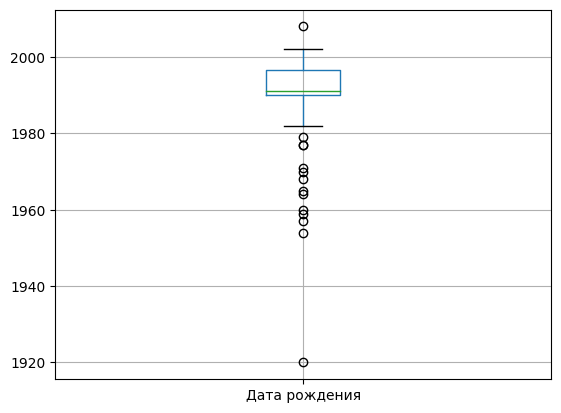

In [135]:
df.boxplot("Дата рождения")

<Axes: >

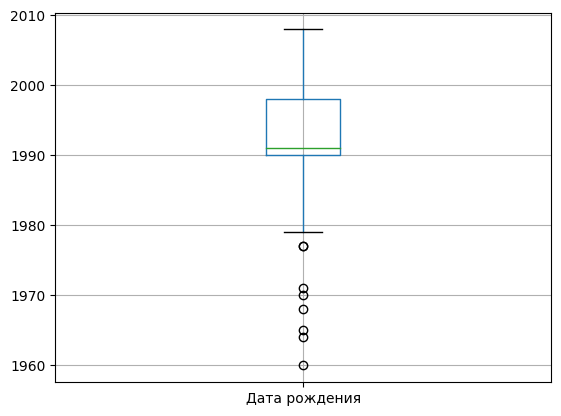

In [136]:
df.loc[df["Дата рождения"]<1960,"Дата рождения"]=None
df.boxplot("Дата рождения")

<Axes: >

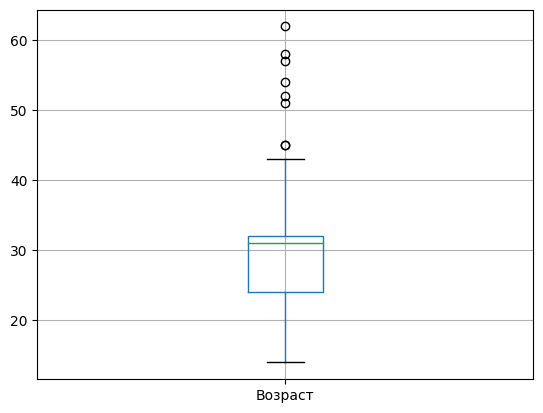

In [137]:
df["Дата рождения"]=2022-df["Дата рождения"]
df=df.rename(columns={"Дата рождения":"Возраст"})
df.boxplot("Возраст")

In [139]:
df["Возраст"] = df["Возраст"].astype(float)


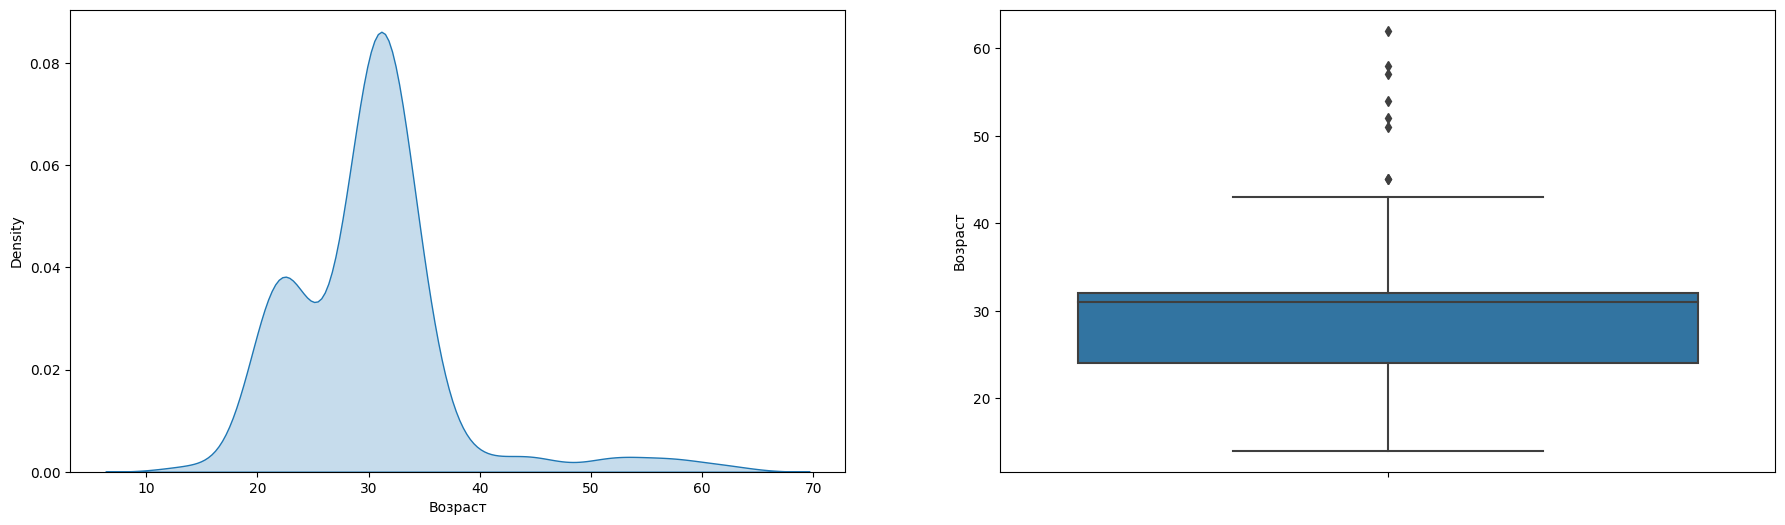

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Возраст"], fill=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Возраст"])

plt.show()

In [141]:
df["Возраст"].isnull().sum()/df.shape[0]

0.59

In [142]:
df["Возраст"].fillna(0,inplace=True)
df

,id,Возраст,Страна,Есть номер,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,"{'id': 1, 'title': 'Россия'}",1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,"{'id': 1, 'title': 'Россия'}",1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,28.0,"{'id': 1, 'title': 'Россия'}",1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,"{'id': 1, 'title': 'Россия'}",1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,"{'id': 65, 'title': 'Германия'}",1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,"{'id': 1, 'title': 'Россия'}",1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


## Страна

In [143]:
df['Страна']=df['Страна'].fillna("{'id':-1,'title':null}").replace("'",'"',regex=True).apply(json.loads).apply(pd.Series)["title"]
df

,id,Возраст,Страна,Есть номер,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,Россия,1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,Россия,1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,28.0,Россия,1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,Россия,1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,Россия,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,Германия,1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,Россия,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


In [144]:
df['Страна'].value_counts(dropna=False)

Страна
Россия        329
NaN            54
Германия        5
Австралия       2
США             2
Япония          1
Гваделупа       1
Израиль         1
Нидерланды      1
Бельгия         1
Дания           1
Беларусь        1
Италия          1
Name: count, dtype: int64

In [145]:
df.drop(columns=["Страна"],inplace=True)
df

,id,Возраст,Есть номер,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,1.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,1.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,28.0,1.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,1.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,1.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


## Есть номер

In [146]:
df['Есть номер'].value_counts(dropna=False)

Есть номер
1.0    376
0.0     14
NaN     10
Name: count, dtype: int64

In [147]:
df.drop(columns="Есть номер",inplace=True)
df

,id,Возраст,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,45.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,28.0,NaN,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


## Подписчики

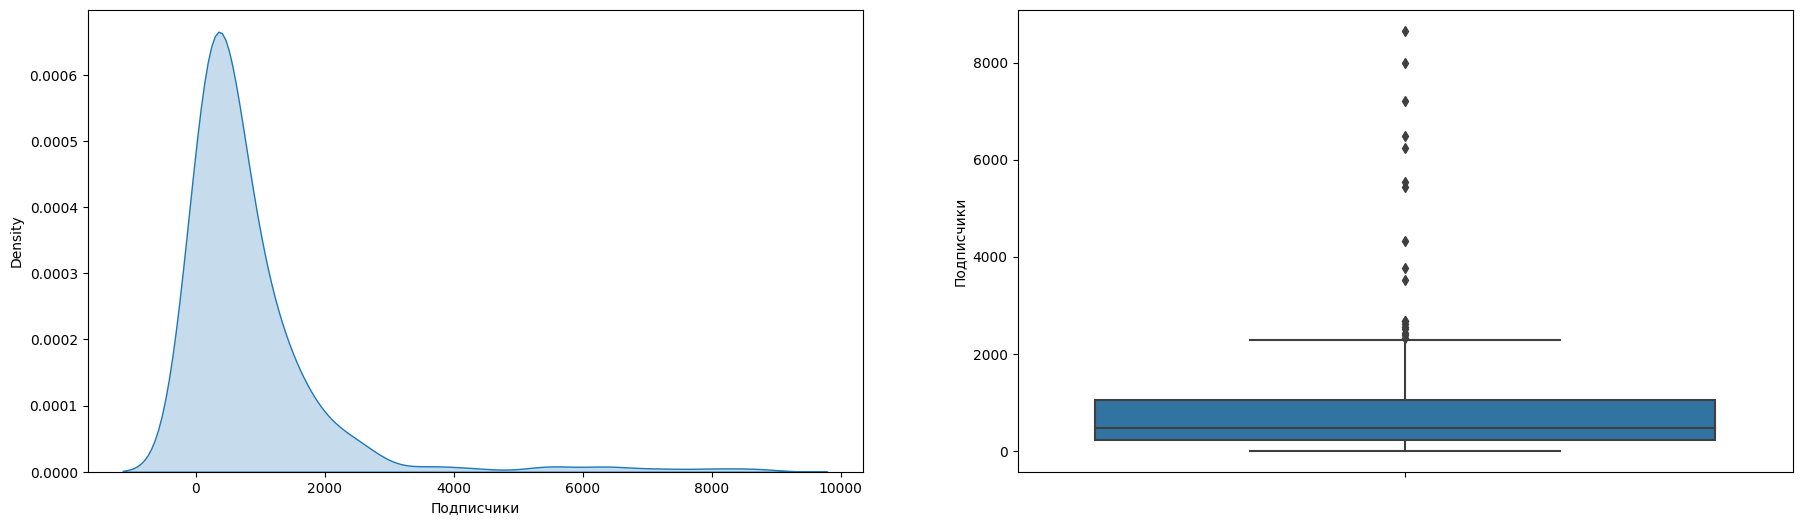

In [148]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Подписчики"], fill=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Подписчики"])

plt.show()

In [149]:
df["Подписчики"].isnull().sum()/df.shape[0]

0.285

In [150]:
df["Подписчики"].fillna(round(df["Подписчики"].mean()),inplace=True)
df

,id,Возраст,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,670.0,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,1203.0,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,45.0,836.0,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,28.0,836.0,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,657.0,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836.0,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,836.0,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,1279.0,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,836.0,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


In [151]:
df["Подписчики"]=df["Подписчики"].astype(int)
df

,id,Возраст,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,670,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,1203,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
2,6745477,45.0,836,NaN,NaN,NaN,NaN,NaN,2,Сергей,Захаров,True,True,deleted,NaN,NaN
3,13570931,28.0,836,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,657,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,836,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,1279,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,836,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


## Общие друзья

In [152]:
df["Общие друзья"].isnull().sum()/df.shape[0]

0.025

In [153]:
df.drop(df[df["Общие друзья"].isnull()].index,inplace=True)
df

,id,Возраст,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,670,12.0,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,1203,36.0,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
3,13570931,28.0,836,4.0,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,657,3.0,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
5,15153851,0.0,423,1.0,NaN,{'inspired_by': ''},[],[],2,Гайсар,Хафизов,True,False,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1.0,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,836,1.0,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,1279,1.0,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,836,1.0,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_2989/2491935910.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df["Общие друзья"], shade=True)


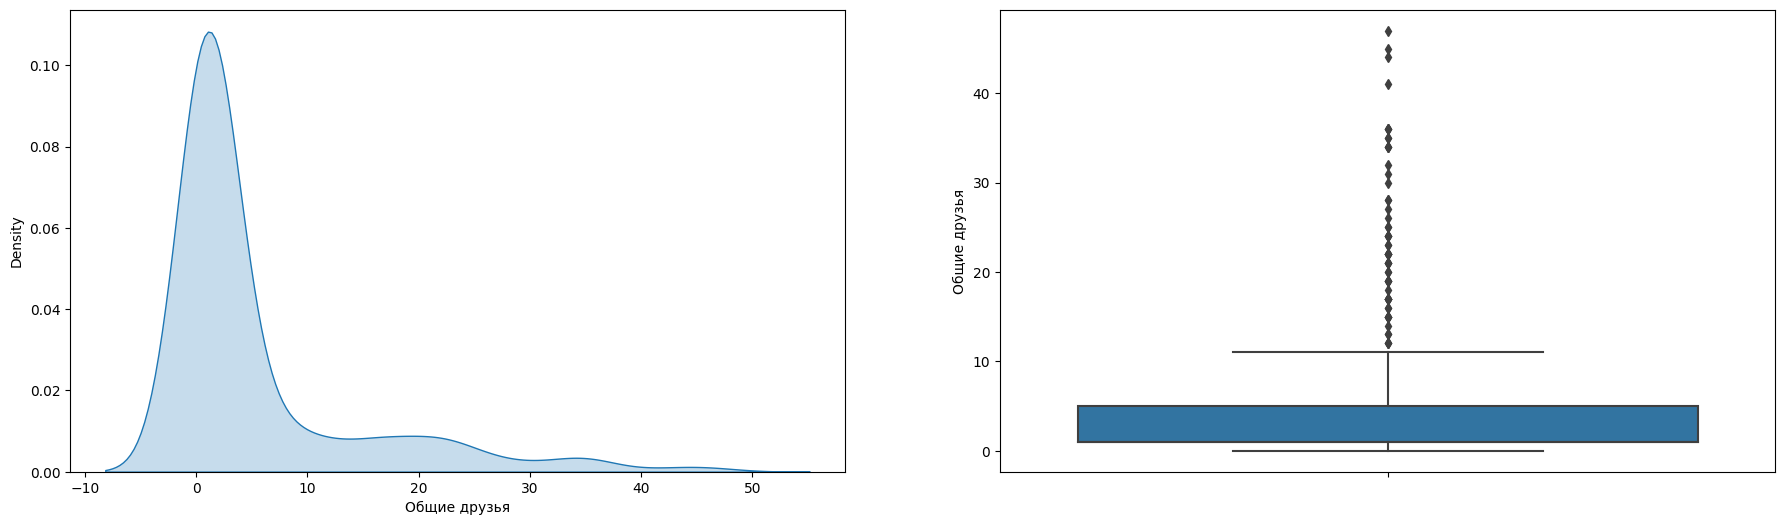

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Общие друзья"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Общие друзья"])

plt.show()

In [155]:
df["Общие друзья"]=df["Общие друзья"].astype(int)
df

,id,Возраст,Подписчики,Общие друзья,Родной город,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,670,12,Москва и Королёв,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,1203,36,Тольятти,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
3,13570931,28.0,836,4,Липецк,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,657,3,Москва,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
5,15153851,0.0,423,1,NaN,{'inspired_by': ''},[],[],2,Гайсар,Хафизов,True,False,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1,NaN,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,836,1,NaN,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,1279,1,NaN,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,836,1,NaN,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


## Родной город

In [156]:
df["Родной город"].isnull().sum()/df.shape[0]

0.6487179487179487

In [157]:
df['Родной город'].value_counts(dropna=False)

Родной город
NaN                                                           253
Москва                                                         36
Тольятти                                                       33
Королёв                                                         5
Самара                                                          3
Москва и Королёв                                                2
тольятти                                                        2
Мытищи                                                          2
Саратов                                                         2
Пермь                                                           2
Санкт-Петербург                                                 2
Красноярск                                                      2
Липецк                                                          2
Новосибирск                                                     1
Элиста                                                         

In [158]:
df[(df["Родной город"] == "")|(df["Родной город"].isnull())|(df["Родной город"] == "Москва")|(df["Родной город"] == "москва")].shape[0]/df.shape[0]

0.7410256410256411

In [159]:
df[((df["Родной город"] == "")|(df["Родной город"].isnull())|(df["Родной город"] == "Москва")|(df["Родной город"] == "москва"))==False]["Родной город"].value_counts()

Родной город
Тольятти                                                      33
Королёв                                                        5
Самара                                                         3
Москва и Королёв                                               2
тольятти                                                       2
Мытищи                                                         2
Саратов                                                        2
Пермь                                                          2
Санкт-Петербург                                                2
Красноярск                                                     2
Липецк                                                         2
Новосибирск                                                    1
Элиста                                                         1
Кинель                                                         1
Сливен                                                         1
Москва, Кеме

In [160]:
df.drop(columns="Родной город",inplace=True)
df

,id,Возраст,Подписчики,Общие друзья,Позиция,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки
0,3113047,31.0,670,12,"{'alcohol': 1, 'inspired_by': 'Книги, существо...","[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e..."
1,6097193,0.0,1203,36,"{'inspired_by': 'работа и сын', 'langs': ['Рус...","[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity..."
3,13570931,28.0,836,4,[],"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b..."
4,13773013,0.0,657,3,"{'alcohol': 0, 'inspired_by': '', 'langs': ['Р...","[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity..."
5,15153851,0.0,423,1,{'inspired_by': ''},[],[],2,Гайсар,Хафизов,True,False,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1,NaN,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN
396,9658196,0.0,836,1,NaN,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN
397,9670156,0.0,1279,1,NaN,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity..."
398,9670929,0.0,836,1,NaN,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN


## Позиция

In [161]:
pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))

,alcohol,inspired_by,langs,langs_full,life_main,people_main,political,religion,religion_id,smoking
0,1.0,"Книги, существование",[Русский],"[{'id': 0, 'native_name': 'Русский'}]",6.0,2.0,5.0,Православие,102.0,1.0
1,NaN,работа и сын,[Русский],"[{'id': 0, 'native_name': 'Русский'}]",1.0,6.0,3.0,Светский гуманизм,200.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,,[Русский],"[{'id': 0, 'native_name': 'Русский'}]",0.0,0.0,8.0,NaN,NaN,0.0
4,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df["Алкоголь"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["alcohol"]
df["Вдохновение"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["inspired_by"]
df["Языки"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["langs"]
df["Смысл жизни"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["life_main"]
df["Главное в людях"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["people_main"]
df["Политическая позиция"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["political"]
df["Курение"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["smoking"]
df["Религия"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["religion"]
df["id религии"]=pd.DataFrame(list(df['Позиция'].fillna("{}").replace("[]","{}").apply(ast.literal_eval)))["religion_id"]
df=df.drop(columns=["Позиция"])
df

,id,Возраст,Подписчики,Общие друзья,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,...,Подписки,Алкоголь,Вдохновение,Языки,Смысл жизни,Главное в людях,Политическая позиция,Курение,Религия,id религии
0,3113047,31.0,670,12,"[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,...,"[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",[Русский],6.0,2.0,5.0,1.0,Православие,102.0
1,6097193,0.0,1203,36,"[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,...,"[{""id"": 96119971, ""description"": """", ""activity...",NaN,работа и сын,[Русский],1.0,6.0,3.0,NaN,Светский гуманизм,200.0
3,13570931,28.0,836,4,"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,...,"[{""id"": 34215577, ""description"": ""\u041c\u044b...",0.0,,[Русский],0.0,0.0,8.0,0.0,NaN,NaN
4,13773013,0.0,657,3,"[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,...,"[{""id"": 31976785, ""description"": """", ""activity...",NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15153851,0.0,423,1,[],[],2,Гайсар,Хафизов,True,...,"[{""id"": 4100014, ""description"": ""\u041e\u0434\...",NaN,NaN,[Русский],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1,NaN,NaN,1,Ирина,Зверева,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,9658196,0.0,836,1,NaN,NaN,1,Диана,Солнцева,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,9670156,0.0,1279,1,NaN,NaN,1,Наталия,Назаренко,True,...,"[{""id"": 39321576, ""description"": """", ""activity...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,9670929,0.0,836,1,NaN,NaN,1,Юлия,Гаврилова,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Алкоголь

In [163]:
df["Алкоголь"]=df["Алкоголь"].replace(0,None).fillna(round(df["Алкоголь"].replace(0,None).mean()))
df

,id,Возраст,Подписчики,Общие друзья,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,...,Подписки,Алкоголь,Вдохновение,Языки,Смысл жизни,Главное в людях,Политическая позиция,Курение,Религия,id религии
0,3113047,31.0,670,12,"[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,...,"[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",[Русский],6.0,2.0,5.0,1.0,Православие,102.0
1,6097193,0.0,1203,36,"[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,...,"[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,[Русский],1.0,6.0,3.0,NaN,Светский гуманизм,200.0
3,13570931,28.0,836,4,"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,...,"[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,[Русский],0.0,0.0,8.0,0.0,NaN,NaN
4,13773013,0.0,657,3,"[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,...,"[{""id"": 31976785, ""description"": """", ""activity...",3.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15153851,0.0,423,1,[],[],2,Гайсар,Хафизов,True,...,"[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,[Русский],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1,NaN,NaN,1,Ирина,Зверева,False,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,9658196,0.0,836,1,NaN,NaN,1,Диана,Солнцева,False,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,9670156,0.0,1279,1,NaN,NaN,1,Наталия,Назаренко,True,...,"[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,9670929,0.0,836,1,NaN,NaN,1,Юлия,Гаврилова,False,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Языки

In [164]:
df["Языки"].astype(str).value_counts()

Языки
nan                                                                  255
['Русский']                                                           79
['Русский', 'English']                                                24
['Русский', 'English', 'Deutsch']                                      9
['Русский', 'English', 'Français']                                     2
['English']                                                            2
['Русский', 'English', 'Español']                                      1
['Русский', 'English', 'Español', 'Deutsch']                           1
['Русский', 'English', 'Deutsch', '汉语']                                1
['Español', 'English']                                                 1
['Русский', 'English', 'Български']                                    1
['English', 'Русский']                                                 1
['Русский', 'English', '汉语']                                           1
['ქართული', 'Türkçe', 'Türkmen']             

In [165]:
df=df.drop(columns=["Языки"])
df

,id,Возраст,Подписчики,Общие друзья,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,...,Группы,Подписки,Алкоголь,Вдохновение,Смысл жизни,Главное в людях,Политическая позиция,Курение,Религия,id религии
0,3113047,31.0,670,12,"[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,...,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",6.0,2.0,5.0,1.0,Православие,102.0
1,6097193,0.0,1203,36,"[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,...,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,1.0,6.0,3.0,NaN,Светский гуманизм,200.0
3,13570931,28.0,836,4,"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,...,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,0.0,0.0,8.0,0.0,NaN,NaN
4,13773013,0.0,657,3,"[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,...,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity...",3.0,,NaN,NaN,NaN,NaN,NaN,NaN
5,15153851,0.0,423,1,[],[],2,Гайсар,Хафизов,True,...,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1,NaN,NaN,1,Ирина,Зверева,False,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,9658196,0.0,836,1,NaN,NaN,1,Диана,Солнцева,False,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,9670156,0.0,1279,1,NaN,NaN,1,Наталия,Назаренко,True,...,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,9670929,0.0,836,1,NaN,NaN,1,Юлия,Гаврилова,False,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Смысл жизни

In [166]:
df["Смысл жизни"]=df["Смысл жизни"].replace(0,None).replace({1:"Семья и дети",2:"Карьера и деньги",3:"Развлечение и отдых",
                                           4:"Наука и исследования",5:"Совершенствование мира",
                                           6:"Саморазвитие",7:"Красота и искусство",8:"Слава и влияние"})
df["Смысл жизни"]

0      Саморазвитие
1      Семья и дети
3              None
4               NaN
5               NaN
           ...     
395             NaN
396             NaN
397             NaN
398             NaN
399             NaN
Name: Смысл жизни, Length: 390, dtype: object

In [167]:
df["Смысл жизни"].value_counts(dropna=False)

Смысл жизни
NaN                       258
None                       98
Саморазвитие               15
Семья и дети                7
Совершенствование мира      5
Развлечение и отдых         4
Карьера и деньги            2
Красота и искусство         1
Name: count, dtype: int64

In [168]:
df["Смысл жизни"].isnull().sum()

356

In [169]:
df=df.drop(columns=["Смысл жизни"])

### Главное в людях

In [170]:
df["Главное в людях"]=df["Главное в людях"].replace(0,None).replace({1:"Ум и креативность",2:"Доброта и честность",3:"Красота и здоровье",
                                           4:"Власть и богатство",5:"Смелость и упорство",
                                           6:"Юмор и жизнелюбие"})
df["Главное в людях"]

0      Доброта и честность
1        Юмор и жизнелюбие
3                     None
4                      NaN
5                      NaN
              ...         
395                    NaN
396                    NaN
397                    NaN
398                    NaN
399                    NaN
Name: Главное в людях, Length: 390, dtype: object

In [171]:
df["Главное в людях"].isnull().sum()

353

In [172]:
df=df.drop(columns=["Главное в людях"])

### Политическая позиция

In [173]:
df["Политическая позиция"]=df["Политическая позиция"].replace(0,None).replace({1:"Коммунизм",2:"Социализм",3:"Аполитическая",
                                           4:"Либерализм",5:"Консерватизм",6:"Монархия",7:"Ультраконсерватизм",8:"Аполитическая",
                                           9:"Либертарианство"})
df["Политическая позиция"]

0       Консерватизм
1      Аполитическая
3      Аполитическая
4                NaN
5                NaN
           ...      
395              NaN
396              NaN
397              NaN
398              NaN
399              NaN
Name: Политическая позиция, Length: 390, dtype: object

In [174]:
df["Политическая позиция"].isnull().sum()

347

In [175]:
df=df.drop(columns=["Политическая позиция"])

### Курение

In [176]:
df["Курение"]=df["Курение"].replace(0,None).fillna(round(df["Курение"].replace(0,None).mean()))
df

,id,Возраст,Подписчики,Общие друзья,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия,id религии
0,3113047,31.0,670,12,"[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",1.0,Православие,102.0
1,6097193,0.0,1203,36,"[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,2.0,Светский гуманизм,200.0
3,13570931,28.0,836,4,"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,2.0,NaN,NaN
4,13773013,0.0,657,3,"[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity...",3.0,,2.0,NaN,NaN
5,15153851,0.0,423,1,[],[],2,Гайсар,Хафизов,True,False,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN
396,9658196,0.0,836,1,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN
397,9670156,0.0,1279,1,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,2.0,NaN,NaN
398,9670929,0.0,836,1,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN


In [177]:
df["Курение"].isnull().sum()

0

### Религия

In [178]:
df["id религии"].notnull().sum()

24

In [179]:
df=df.drop(columns=["id религии"])

In [180]:
df["Религия"].notnull().sum()

46

In [181]:
df["Религия"].value_counts(dropna=False)

Религия
NaN                                                                        344
Православие                                                                 13
Светский гуманизм                                                            4
Пастафарианство                                                              2
Буддизм                                                                      2
Ислам                                                                        2
Chaotic Good                                                                 1
в себя и в Бога.                                                             1
Случайность                                                                  1
иллюзия позитивного реализма                                                 1
АаА                                                                          1
В Бога верят все: одни - что он есть, другие - что его нет                   1
Ктулхуизм                                   

## ВУЗы

In [182]:
df

,id,Возраст,Подписчики,Общие друзья,ВУЗы,Школы,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
0,3113047,31.0,670,12,"[{'chair': 1897, 'chair_name': 'Программное об...","[{'city': 859, 'class': 'в', 'class_id': 3, 'c...",2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",1.0,Православие
1,6097193,0.0,1203,36,"[{'chair': 111112, 'chair_name': 'Педагогика и...","[{'city': 143, 'class': 'а', 'class_id': 1, 'c...",1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,2.0,Светский гуманизм
3,13570931,28.0,836,4,"[{'city': 1, 'country': 1, 'education_form': '...","[{'city': 78, 'class': 'в', 'class_id': 3, 'co...",1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,2.0,NaN
4,13773013,0.0,657,3,"[{'chair': 2036808, 'chair_name': 'Внешнеэконо...","[{'city': 1, 'class': 'а', 'class_id': 1, 'cou...",2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity...",3.0,,2.0,NaN
5,15153851,0.0,423,1,[],[],2,Гайсар,Хафизов,True,False,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1,NaN,NaN,1,Ирина,Зверева,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
396,9658196,0.0,836,1,NaN,NaN,1,Диана,Солнцева,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
397,9670156,0.0,1279,1,NaN,NaN,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,2.0,NaN
398,9670929,0.0,836,1,NaN,NaN,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN


In [183]:
df=df.drop(columns=["ВУЗы","Школы"])

## Закрытый профиль

In [184]:
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
0,3113047,31.0,670,12,2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",1.0,Православие
1,6097193,0.0,1203,36,1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,2.0,Светский гуманизм
3,13570931,28.0,836,4,1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,2.0,NaN
4,13773013,0.0,657,3,2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity...",3.0,,2.0,NaN
5,15153851,0.0,423,1,2,Гайсар,Хафизов,True,False,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9652020,33.0,836,1,1,Ирина,Зверева,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
396,9658196,0.0,836,1,1,Диана,Солнцева,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
397,9670156,0.0,1279,1,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,2.0,NaN
398,9670929,0.0,836,1,1,Юлия,Гаврилова,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN


In [185]:
df[df["Доступ к закытому профилю"] == False]

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
154,6477,0.0,836,1,1,Оксана,Озерная,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
166,395277,0.0,836,1,2,Михаил,Роскин,False,True,NaN,NaN,NaN,3.0,Inspired by every particle of our great world!,1.0,NaN
172,694701,32.0,836,1,2,Роман,Шоборов,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
174,802442,0.0,836,3,1,Лилия,Волкова,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
178,1029618,0.0,836,1,1,Vasilisa,Glukhova,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,9243000,0.0,836,1,1,Анна,Лукьянова,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
393,9577244,30.0,836,1,2,Алексей,Баламутенко,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
395,9652020,33.0,836,1,1,Ирина,Зверева,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN
396,9658196,0.0,836,1,1,Диана,Солнцева,False,True,NaN,NaN,NaN,3.0,NaN,2.0,NaN


In [186]:
df[df["Доступ к закытому профилю"] == False].shape[0]

63

In [187]:
df=df.drop(df[df["Доступ к закытому профилю"] == False].index)
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Доступ к закытому профилю,Закрытый профиль,Неактивная страница,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
0,3113047,31.0,670,12,2,Денис,Бекасов,True,False,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",1.0,Православие
1,6097193,0.0,1203,36,1,Ирина,Шушакова,True,False,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,2.0,Светский гуманизм
3,13570931,28.0,836,4,1,Маша,Сажина,True,True,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,2.0,NaN
4,13773013,0.0,657,3,2,Antik,Designer,True,False,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity...",3.0,,2.0,NaN
5,15153851,0.0,423,1,2,Гайсар,Хафизов,True,False,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,True,False,NaN,"[{""id"": 25557243, ""description"": """", ""activity...","[{""id"": 25557243, ""description"": """", ""activity...",3.0,NaN,2.0,NaN
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,True,False,NaN,"[{""id"": 32041317, ""description"": ""Just for fun...","[{""id"": 32041317, ""description"": ""Just for fun...",3.0,NaN,2.0,NaN
394,9625958,33.0,2318,1,1,Маша,Маринина,True,False,NaN,"[{""id"": 215758053, ""description"": """", ""activit...","[{""id"": 215758053, ""description"": """", ""activit...",3.0,NaN,2.0,NaN
397,9670156,0.0,1279,1,1,Наталия,Назаренко,True,False,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,2.0,NaN


In [188]:
df=df.drop(columns=["Закрытый профиль","Доступ к закытому профилю"])
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Неактивная страница,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
0,3113047,31.0,670,12,2,Денис,Бекасов,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",1.0,Православие
1,6097193,0.0,1203,36,1,Ирина,Шушакова,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,2.0,Светский гуманизм
3,13570931,28.0,836,4,1,Маша,Сажина,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,2.0,NaN
4,13773013,0.0,657,3,2,Antik,Designer,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity...",3.0,,2.0,NaN
5,15153851,0.0,423,1,2,Гайсар,Хафизов,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,NaN,"[{""id"": 25557243, ""description"": """", ""activity...","[{""id"": 25557243, ""description"": """", ""activity...",3.0,NaN,2.0,NaN
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,NaN,"[{""id"": 32041317, ""description"": ""Just for fun...","[{""id"": 32041317, ""description"": ""Just for fun...",3.0,NaN,2.0,NaN
394,9625958,33.0,2318,1,1,Маша,Маринина,NaN,"[{""id"": 215758053, ""description"": """", ""activit...","[{""id"": 215758053, ""description"": """", ""activit...",3.0,NaN,2.0,NaN
397,9670156,0.0,1279,1,1,Наталия,Назаренко,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,2.0,NaN


## Неактивная страница

In [189]:
df[df["Неактивная страница"].isnull()]

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Неактивная страница,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
0,3113047,31.0,670,12,2,Денис,Бекасов,NaN,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",1.0,Православие
1,6097193,0.0,1203,36,1,Ирина,Шушакова,NaN,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,2.0,Светский гуманизм
3,13570931,28.0,836,4,1,Маша,Сажина,NaN,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,2.0,NaN
4,13773013,0.0,657,3,2,Antik,Designer,NaN,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity...",3.0,,2.0,NaN
5,15153851,0.0,423,1,2,Гайсар,Хафизов,NaN,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,NaN,"[{""id"": 25557243, ""description"": """", ""activity...","[{""id"": 25557243, ""description"": """", ""activity...",3.0,NaN,2.0,NaN
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,NaN,"[{""id"": 32041317, ""description"": ""Just for fun...","[{""id"": 32041317, ""description"": ""Just for fun...",3.0,NaN,2.0,NaN
394,9625958,33.0,2318,1,1,Маша,Маринина,NaN,"[{""id"": 215758053, ""description"": """", ""activit...","[{""id"": 215758053, ""description"": """", ""activit...",3.0,NaN,2.0,NaN
397,9670156,0.0,1279,1,1,Наталия,Назаренко,NaN,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,2.0,NaN


In [190]:
df=df.drop(columns=["Неактивная страница"])
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
0,3113047,31.0,670,12,2,Денис,Бекасов,"[{""id"": 22781583, ""description"": ""\u041d\u043e...","[{""id"": 22781583, ""description"": ""\u041d\u043e...",1.0,"Книги, существование",1.0,Православие
1,6097193,0.0,1203,36,1,Ирина,Шушакова,"[{""id"": 101490443, ""description"": """", ""activit...","[{""id"": 96119971, ""description"": """", ""activity...",3.0,работа и сын,2.0,Светский гуманизм
3,13570931,28.0,836,4,1,Маша,Сажина,"[{""id"": 12648877, ""description"": ""\u0421\u0430...","[{""id"": 34215577, ""description"": ""\u041c\u044b...",3.0,,2.0,NaN
4,13773013,0.0,657,3,2,Antik,Designer,"[{""id"": 31976785, ""description"": """", ""activity...","[{""id"": 31976785, ""description"": """", ""activity...",3.0,,2.0,NaN
5,15153851,0.0,423,1,2,Гайсар,Хафизов,"[{""id"": 33431032, ""description"": ""A$AP Rocky -...","[{""id"": 4100014, ""description"": ""\u041e\u0434\...",3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,"[{""id"": 25557243, ""description"": """", ""activity...","[{""id"": 25557243, ""description"": """", ""activity...",3.0,NaN,2.0,NaN
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,"[{""id"": 32041317, ""description"": ""Just for fun...","[{""id"": 32041317, ""description"": ""Just for fun...",3.0,NaN,2.0,NaN
394,9625958,33.0,2318,1,1,Маша,Маринина,"[{""id"": 215758053, ""description"": """", ""activit...","[{""id"": 215758053, ""description"": """", ""activit...",3.0,NaN,2.0,NaN
397,9670156,0.0,1279,1,1,Наталия,Назаренко,"[{""id"": 39321576, ""description"": """", ""activity...","[{""id"": 39321576, ""description"": """", ""activity...",3.0,NaN,2.0,NaN


## Извлечение текста

In [191]:
t=pd.DataFrame(json.loads(df["Группы"][0]))
t[t["type"] == "page"]

,id,description,activity,name,screen_name,is_closed,type,is_admin,is_member,is_advertiser,photo_50,photo_100,photo_200
0,22781583,"Новости и аналитика об играх, а также актуальн...",Игры,DTF,dtf,0,page,0,0,0,https://sun6-23.userapi.com/s/v1/if2/bxbWK0k7Y...,https://sun6-23.userapi.com/s/v1/if2/m85I8VaDR...,https://sun6-23.userapi.com/s/v1/if2/RTBiWXi3M...
1,91933860,N + 1 — научно-популярное издание о прогрессе ...,Интернет-СМИ,N + 1,nplusone,0,page,0,0,0,https://sun6-20.userapi.com/s/v1/ig2/zvDRQXM_u...,https://sun6-20.userapi.com/s/v1/ig2/pgnIbli7y...,https://sun6-20.userapi.com/s/v1/ig2/HF2pBGrc7...
2,20629724,Вместе с вами строим IT-сообщество с 2006 года...,Программирование,Хабр,habr,0,page,0,0,0,https://sun6-22.userapi.com/s/v1/ig1/sf5SNUbbw...,https://sun6-22.userapi.com/s/v1/ig1/Dlfkb-4Xa...,https://sun6-22.userapi.com/s/v1/ig1/9muZqzdYl...
3,72495085,"Юмор о программировании и всём, что связано с ...",Программирование,/dev/null,tnull,0,page,0,1,0,https://sun6-21.userapi.com/s/v1/ig2/7Z-Wp0UhK...,https://sun6-21.userapi.com/s/v1/ig2/FJDmonxKL...,https://sun6-21.userapi.com/s/v1/ig2/Tqzf7suaJ...
4,171217676,Смотрим на историю через призму фотографий!\nЗ...,История,История в кадрах. Now&Then Russia,nowandthenrussia,0,page,0,0,0,https://sun6-21.userapi.com/s/v1/ig2/S516voxjf...,https://sun6-21.userapi.com/s/v1/ig2/C_sdZejG3...,https://sun6-21.userapi.com/s/v1/ig2/GAmOvm4Qf...
5,165908544,Подпишитесь на наш Telegram-канал\nhttps://t.m...,Дизайн и графика,Советский дизайн,sovdizajn,0,page,0,0,0,https://sun6-22.userapi.com/s/v1/if1/mu1nw_x-x...,https://sun6-22.userapi.com/s/v1/if1/P0GJs2vTE...,https://sun6-22.userapi.com/s/v1/if1/FjLJfsyMD...
6,81574241,Уютная мечта детства,Видеоигры,DOS4GW.EXE,dos4gw,0,page,0,0,0,https://sun6-20.userapi.com/s/v1/ig2/icSwEY0NS...,https://sun6-20.userapi.com/s/v1/ig2/QoFA9klKu...,https://sun6-20.userapi.com/s/v1/ig2/sqhCL7Uby...
7,168112329,,Культура,Волны,club168112329,0,page,0,0,0,https://sun6-22.userapi.com/s/v1/if1/4AnO5_2Ff...,https://sun6-22.userapi.com/s/v1/if1/1HWbJhNbe...,https://sun6-22.userapi.com/s/v1/if1/P2kHtPrNc...
8,103133619,"Стильные пердёжные\nМемы молодёжные\n\nВсё, чт...",Юмор,BAUMAN MEMES,bauman_memes,0,page,0,1,0,https://sun6-22.userapi.com/s/v1/ig2/_eZvj6pWp...,https://sun6-22.userapi.com/s/v1/ig2/ZHKhNsSV9...,https://sun6-22.userapi.com/s/v1/ig2/FPNcmpVFa...
9,160168013,Системные требования сообщества: \n ...,Видеоигры,WIN95.EXE™,win95.exe.file,0,page,0,0,0,https://sun6-23.userapi.com/s/v1/ig1/C6IinpiuZ...,https://sun6-23.userapi.com/s/v1/ig1/-mVt5SOmu...,https://sun6-23.userapi.com/s/v1/ig1/JMd2ml_Mx...


In [192]:
#k=0
def f(s):
  #global k
  #print(k)
  #k+=1
  if s == "[]":
    return ""
  t=pd.DataFrame(json.loads(s))
  try:
    t["name"]=t["name"].fillna("").apply(lambda x: " ".join(map(lambda x:x.lower(),re.findall(r"(\w*[ЦцКкНнГгШшЩщЗзХхФфВвПпРрЛлДдЖжЧчСсМмТтБб])[УуЕеЫыАаОоЭэЯяИиЬьЮюЯяЙй]*",x))))#,re.findall(r"\W([А-Яа-яЁё]+[ЦцКкНнГгШшЩщЗзХхФфВвПпРрЛлДдЖжЧчСсМмТтБб])[УуЕеЫыАаОоЭэЯяИиЬьЮю]\W",x))))
    t["description"]=t["description"].fillna("").apply(lambda x: " ".join(map(lambda x:x.lower(),re.findall(r"(\w*[ЦцКкНнГгШшЩщЗзХхФфВвПпРрЛлДдЖжЧчСсМмТтБб])[УуЕеЫыАаОоЭэЯяИиЬьЮюЯяЙй]*",x))))#[\w']+
    t["activity"]=t["activity"].fillna("").apply(lambda x: " ".join(map(lambda x:x.lower(),re.findall(r"(\w*[ЦцКкНнГгШшЩщЗзХхФфВвПпРрЛлДдЖжЧчСсМмТтБб])[УуЕеЫыАаОоЭэЯяИиЬьЮюЯяЙй]*",x))))
    t["rez"]=t["name"]+" "+t["description"]+" "+t["activity"]+" "
  except:
    return ""
  return t["rez"].sum().strip()
df["Группы"]=df["Группы"].fillna("[]").apply(f)
df["Подписки"]=df["Подписки"].fillna("[]").apply(f)

In [193]:
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
0,3113047,31.0,670,12,2,Денис,Бекасов,новост аналитик об играх такж актуальн информа...,новост аналитик об играх такж актуальн информа...,1.0,"Книги, существование",1.0,Православие
1,6097193,0.0,1203,36,1,Ирина,Шушакова,профил истор класс открыт групп открыт чемпио...,чп тольятт интернет см черн список тольятт че...,3.0,работа и сын,2.0,Светский гуманизм
3,13570931,28.0,836,4,1,Маша,Сажина,английск язык дл всех сам крупн русскоязычн со...,подслушан здес говорят теб м публикуем тольк т...,3.0,,2.0,NaN
4,13773013,0.0,657,3,2,Antik,Designer,наук техник наук умн журнал дл успешных люд ...,наук техник наук умн журнал дл успешных люд ...,3.0,,2.0,NaN
5,15153851,0.0,423,1,2,Гайсар,Хафизов,американск хип хоп исполнител музыкальн продюс...,нов альбом один из самых популярных музыкальны...,3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,кин вложен денег с умом блог александр иванов ...,кин немецк дл лентяев н тер времен подключайс ...,3.0,NaN,2.0,NaN
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,юмор лентач интернет см анекдот категор б юм...,юмор лентач интернет см научн популярн издан...,3.0,NaN,2.0,NaN
394,9625958,33.0,2318,1,1,Маша,Маринина,дар образован институт перв академ мед р плех...,дар образован институт перв академ мед р плех...,3.0,NaN,2.0,NaN
397,9670156,0.0,1279,1,1,Наталия,Назаренко,любл русск язык образован немецк язык м помож...,любл русск язык образован немецк язык м помож...,3.0,NaN,2.0,NaN


In [194]:
def f(x):
  return " ".join(map(lambda x:x.lower(),re.findall(r"(\w*[ЦцКкНнГгШшЩщЗзХхФфВвПпРрЛлДдЖжЧчСсМмТтБб])[УуЕеЫыАаОоЭэЯяИиЬьЮюЯяЙй]*",x)))
df["Вдохновение"]=df["Вдохновение"].fillna("").apply(f)
df["Религия"]=df["Религия"].fillna("").apply(f)
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия
0,3113047,31.0,670,12,2,Денис,Бекасов,новост аналитик об играх такж актуальн информа...,новост аналитик об играх такж актуальн информа...,1.0,книг существован,1.0,православ
1,6097193,0.0,1203,36,1,Ирина,Шушакова,профил истор класс открыт групп открыт чемпио...,чп тольятт интернет см черн список тольятт че...,3.0,работ сын,2.0,светск гуманизм
3,13570931,28.0,836,4,1,Маша,Сажина,английск язык дл всех сам крупн русскоязычн со...,подслушан здес говорят теб м публикуем тольк т...,3.0,,2.0,
4,13773013,0.0,657,3,2,Antik,Designer,наук техник наук умн журнал дл успешных люд ...,наук техник наук умн журнал дл успешных люд ...,3.0,,2.0,
5,15153851,0.0,423,1,2,Гайсар,Хафизов,американск хип хоп исполнител музыкальн продюс...,нов альбом один из самых популярных музыкальны...,3.0,,2.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,кин вложен денег с умом блог александр иванов ...,кин немецк дл лентяев н тер времен подключайс ...,3.0,,2.0,
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,юмор лентач интернет см анекдот категор б юм...,юмор лентач интернет см научн популярн издан...,3.0,,2.0,
394,9625958,33.0,2318,1,1,Маша,Маринина,дар образован институт перв академ мед р плех...,дар образован институт перв академ мед р плех...,3.0,,2.0,
397,9670156,0.0,1279,1,1,Наталия,Назаренко,любл русск язык образован немецк язык м помож...,любл русск язык образован немецк язык м помож...,3.0,,2.0,


In [195]:
df["Текст"]=df["Группы"]+" "+df["Подписки"]+" "+" "+" "+" "+df["Религия"]+" "+df["Вдохновение"]+" "
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Группы,Подписки,Алкоголь,Вдохновение,Курение,Религия,Текст
0,3113047,31.0,670,12,2,Денис,Бекасов,новост аналитик об играх такж актуальн информа...,новост аналитик об играх такж актуальн информа...,1.0,книг существован,1.0,православ,новост аналитик об играх такж актуальн информа...
1,6097193,0.0,1203,36,1,Ирина,Шушакова,профил истор класс открыт групп открыт чемпио...,чп тольятт интернет см черн список тольятт че...,3.0,работ сын,2.0,светск гуманизм,профил истор класс открыт групп открыт чемпио...
3,13570931,28.0,836,4,1,Маша,Сажина,английск язык дл всех сам крупн русскоязычн со...,подслушан здес говорят теб м публикуем тольк т...,3.0,,2.0,,английск язык дл всех сам крупн русскоязычн со...
4,13773013,0.0,657,3,2,Antik,Designer,наук техник наук умн журнал дл успешных люд ...,наук техник наук умн журнал дл успешных люд ...,3.0,,2.0,,наук техник наук умн журнал дл успешных люд ...
5,15153851,0.0,423,1,2,Гайсар,Хафизов,американск хип хоп исполнител музыкальн продюс...,нов альбом один из самых популярных музыкальны...,3.0,,2.0,,американск хип хоп исполнител музыкальн продюс...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,кин вложен денег с умом блог александр иванов ...,кин немецк дл лентяев н тер времен подключайс ...,3.0,,2.0,,кин вложен денег с умом блог александр иванов ...
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,юмор лентач интернет см анекдот категор б юм...,юмор лентач интернет см научн популярн издан...,3.0,,2.0,,юмор лентач интернет см анекдот категор б юм...
394,9625958,33.0,2318,1,1,Маша,Маринина,дар образован институт перв академ мед р плех...,дар образован институт перв академ мед р плех...,3.0,,2.0,,дар образован институт перв академ мед р плех...
397,9670156,0.0,1279,1,1,Наталия,Назаренко,любл русск язык образован немецк язык м помож...,любл русск язык образован немецк язык м помож...,3.0,,2.0,,любл русск язык образован немецк язык м помож...


In [196]:
df=df.drop(columns=["Группы","Подписки","Религия","Вдохновение"])
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Текст
0,3113047,31.0,670,12,2,Денис,Бекасов,1.0,1.0,новост аналитик об играх такж актуальн информа...
1,6097193,0.0,1203,36,1,Ирина,Шушакова,3.0,2.0,профил истор класс открыт групп открыт чемпио...
3,13570931,28.0,836,4,1,Маша,Сажина,3.0,2.0,английск язык дл всех сам крупн русскоязычн со...
4,13773013,0.0,657,3,2,Antik,Designer,3.0,2.0,наук техник наук умн журнал дл успешных люд ...
5,15153851,0.0,423,1,2,Гайсар,Хафизов,3.0,2.0,американск хип хоп исполнител музыкальн продюс...
...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,3.0,2.0,кин вложен денег с умом блог александр иванов ...
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,3.0,2.0,юмор лентач интернет см анекдот категор б юм...
394,9625958,33.0,2318,1,1,Маша,Маринина,3.0,2.0,дар образован институт перв академ мед р плех...
397,9670156,0.0,1279,1,1,Наталия,Назаренко,3.0,2.0,любл русск язык образован немецк язык м помож...


In [197]:
txt=df["Текст"].sum()

In [198]:
m=txt.split(" ")

In [199]:
tdf=pd.Series(m)

In [200]:
tdf

0            новост
1          аналитик
2                об
3             играх
4              такж
             ...   
1840279            
1840280            
1840281            
1840282            
1840283            
Length: 1840284, dtype: object

In [201]:
tdf=tdf.drop(tdf[tdf==""].index)
tdf

0                 новост
1               аналитик
2                     об
3                  играх
4                   такж
               ...      
1840273    промышленност
1840274       реалистичн
1840275         экономик
1840276           открыт
1840277            групп
Length: 1816859, dtype: object

In [202]:
tdf=pd.DataFrame(tdf.value_counts()).reset_index().rename(columns={"index":"Слово"})
tdf=tdf.rename(columns={'count':"Частота"})
tdf

,Слово,Частота
0,в,70201
1,н,49584
2,с,25418
3,дл,17965
4,м,17672
...,...,...
75522,пытающиес,1
75523,согласоват,1
75524,вступающих,1
75525,подавших,1


In [203]:
tdf["Длина"]=tdf["Слово"].str.len()
tdf

,Слово,Частота,Длина
0,в,70201,1
1,н,49584,1
2,с,25418,1
3,дл,17965,2
4,м,17672,1
...,...,...,...
75522,пытающиес,1,9
75523,согласоват,1,10
75524,вступающих,1,10
75525,подавших,1,8


In [204]:
tdf=tdf[tdf["Длина"]>4]
tdf

,Слово,Частота,Длина
6,групп,14794,5
11,сообществ,8784,9
19,котор,6472,5
20,новост,6070,6
24,открыт,5767,6
...,...,...,...
75522,пытающиес,1,9
75523,согласоват,1,10
75524,вступающих,1,10
75525,подавших,1,8


In [205]:
tdf["Слово"][:50]

6          групп
11     сообществ
19         котор
20        новост
24        открыт
26         работ
27         тольк
40         музык
41         москв
43         может
46      интересн
48        проект
50     образован
52        бизнес
53       страниц
55      фотограф
57      информац
62         город
63        паблик
65      интернет
66         больш
67         истор
69     организац
76      бесплатн
80         прост
83       тольятт
86        реклам
88        вопрос
89     официальн
91         центр
94     творчеств
96     мероприят
99         будет
101       развит
102       компан
104        одежд
110      культур
111       дизайн
113       команд
117       правил
118     программ
120       создан
121     объявлен
124      человек
125      сообщен
126      доставк
127    путешеств
128        всегд
129       онлайн
131     вконтакт
Name: Слово, dtype: object

In [206]:
slova=["музык","москв","работ","новост","фотограф","творчеств","реклам","бизнес","магазин","культур"]
slova

['музык',
 'москв',
 'работ',
 'новост',
 'фотограф',
 'творчеств',
 'реклам',
 'бизнес',
 'магазин',
 'культур']

In [207]:
df.columns

Index(['id', 'Возраст', 'Подписчики', 'Общие друзья', 'Пол', 'Имя', 'Фамилия',
       'Алкоголь', 'Курение', 'Текст'],
      dtype='object')

In [208]:
#s=df["Текст"][0]
def ps(s):
  t=pd.Series(s.split(" "))
  t=t.drop(t[t==""].index)
  t=pd.DataFrame(t.value_counts()).reset_index().rename(columns={"index":"Слово"})
  t=t.rename(columns={'count':"Частота"})
  slova=["музык","москв","работ","новост","фотограф","творчеств","реклам","бизнес","магазин","культур"]
  t=t.set_index("Слово").to_dict()["Частота"]
  m=[]
  for i in slova:
    m.append(t.get(i,0))
  return pd.Series(m)
tt=df["Текст"].apply(ps)
for i,z in enumerate(["Музыка","Москва","Работа","Новости","Фотография","Творчество","Реклама","Бизнес","Магазин","Культура"]):
  df[z]=tt[i]
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Текст,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
0,3113047,31.0,670,12,2,Денис,Бекасов,1.0,1.0,новост аналитик об играх такж актуальн информа...,0,16,12,15,10,0,6,19,6,12
1,6097193,0.0,1203,36,1,Ирина,Шушакова,3.0,2.0,профил истор класс открыт групп открыт чемпио...,9,3,34,14,3,1,6,1,5,9
3,13570931,28.0,836,4,1,Маша,Сажина,3.0,2.0,английск язык дл всех сам крупн русскоязычн со...,0,20,7,9,6,5,5,4,0,2
4,13773013,0.0,657,3,2,Antik,Designer,3.0,2.0,наук техник наук умн журнал дл успешных люд ...,16,2,9,9,4,8,13,8,2,0
5,15153851,0.0,423,1,2,Гайсар,Хафизов,3.0,2.0,американск хип хоп исполнител музыкальн продюс...,5,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,3.0,2.0,кин вложен денег с умом блог александр иванов ...,0,0,1,0,0,0,0,0,0,4
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,3.0,2.0,юмор лентач интернет см анекдот категор б юм...,2,12,7,19,5,3,8,7,3,2
394,9625958,33.0,2318,1,1,Маша,Маринина,3.0,2.0,дар образован институт перв академ мед р плех...,2,44,16,32,2,11,14,21,0,13
397,9670156,0.0,1279,1,1,Наталия,Назаренко,3.0,2.0,любл русск язык образован немецк язык м помож...,0,0,0,4,2,0,2,0,0,0


In [209]:
df=df.drop(columns=["Текст"])
df

,id,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
0,3113047,31.0,670,12,2,Денис,Бекасов,1.0,1.0,0,16,12,15,10,0,6,19,6,12
1,6097193,0.0,1203,36,1,Ирина,Шушакова,3.0,2.0,9,3,34,14,3,1,6,1,5,9
3,13570931,28.0,836,4,1,Маша,Сажина,3.0,2.0,0,20,7,9,6,5,5,4,0,2
4,13773013,0.0,657,3,2,Antik,Designer,3.0,2.0,16,2,9,9,4,8,13,8,2,0
5,15153851,0.0,423,1,2,Гайсар,Хафизов,3.0,2.0,5,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9459069,30.0,348,1,2,Кирилл,Ласточкин,3.0,2.0,0,0,1,0,0,0,0,0,0,4
392,9562319,30.0,743,1,2,Дмитрий,Алдунин,3.0,2.0,2,12,7,19,5,3,8,7,3,2
394,9625958,33.0,2318,1,1,Маша,Маринина,3.0,2.0,2,44,16,32,2,11,14,21,0,13
397,9670156,0.0,1279,1,1,Наталия,Назаренко,3.0,2.0,0,0,0,4,2,0,2,0,0,0


In [210]:
df=df.set_index("id")
df

,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
id,,,,,,,,,,,,,,,,,,
3113047,31.0,670,12,2,Денис,Бекасов,1.0,1.0,0,16,12,15,10,0,6,19,6,12
6097193,0.0,1203,36,1,Ирина,Шушакова,3.0,2.0,9,3,34,14,3,1,6,1,5,9
13570931,28.0,836,4,1,Маша,Сажина,3.0,2.0,0,20,7,9,6,5,5,4,0,2
13773013,0.0,657,3,2,Antik,Designer,3.0,2.0,16,2,9,9,4,8,13,8,2,0
15153851,0.0,423,1,2,Гайсар,Хафизов,3.0,2.0,5,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459069,30.0,348,1,2,Кирилл,Ласточкин,3.0,2.0,0,0,1,0,0,0,0,0,0,4
9562319,30.0,743,1,2,Дмитрий,Алдунин,3.0,2.0,2,12,7,19,5,3,8,7,3,2
9625958,33.0,2318,1,1,Маша,Маринина,3.0,2.0,2,44,16,32,2,11,14,21,0,13


In [211]:
df[df.isna().any(axis=1)]

,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
id,,,,,,,,,,,,,,,,,,


In [212]:
print(df.index)


Index([ 3113047,  6097193, 13570931, 13773013, 15153851, 16352409, 16838129,
       21753002, 26572932, 32600403,
       ...
        9229921,  9296921,  9305231,  9317489,  9378681,  9459069,  9562319,
        9625958,  9670156,  9685132],
      dtype='int64', name='id', length=327)


In [213]:
df.loc[9685132]

Возраст              27.0
Подписчики            113
Общие друзья            1
Пол                     2
Имя                  Иван
Фамилия         Дружицкий
Алкоголь              3.0
Курение               2.0
Музыка                  0
Москва                  0
Работа                  0
Новости                 0
Фотография              0
Творчество              0
Реклама                 0
Бизнес                  0
Магазин                 0
Культура                0
Name: 9685132, dtype: object

In [214]:
m={}
for i in ["Музыка","Москва","Работа","Новости","Фотография","Творчество","Реклама","Бизнес","Магазин","Культура"]:
  m[i]=round(df[i]/(df["Музыка"].fillna(0)+df["Москва"].fillna(0)+df["Работа"].fillna(0)+df["Новости"].fillna(0)+
                    df["Фотография"].fillna(0)+df["Творчество"].fillna(0)+df["Реклама"].fillna(0)+df["Бизнес"].fillna(0)+df["Магазин"].fillna(0)+df["Культура"].fillna(0))*100)
for i in ["Музыка","Москва","Работа","Новости","Фотография","Творчество","Реклама","Бизнес","Магазин","Культура"]:
  df[i]=m[i]
df

,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
id,,,,,,,,,,,,,,,,,,
3113047,31.0,670,12,2,Денис,Бекасов,1.0,1.0,0.0,17.0,12.0,16.0,10.0,0.0,6.0,20.0,6.0,12.0
6097193,0.0,1203,36,1,Ирина,Шушакова,3.0,2.0,11.0,4.0,40.0,16.0,4.0,1.0,7.0,1.0,6.0,11.0
13570931,28.0,836,4,1,Маша,Сажина,3.0,2.0,0.0,34.0,12.0,16.0,10.0,9.0,9.0,7.0,0.0,3.0
13773013,0.0,657,3,2,Antik,Designer,3.0,2.0,23.0,3.0,13.0,13.0,6.0,11.0,18.0,11.0,3.0,0.0
15153851,0.0,423,1,2,Гайсар,Хафизов,3.0,2.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459069,30.0,348,1,2,Кирилл,Ласточкин,3.0,2.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
9562319,30.0,743,1,2,Дмитрий,Алдунин,3.0,2.0,3.0,18.0,10.0,28.0,7.0,4.0,12.0,10.0,4.0,3.0
9625958,33.0,2318,1,1,Маша,Маринина,3.0,2.0,1.0,28.0,10.0,21.0,1.0,7.0,9.0,14.0,0.0,8.0


In [215]:
df=df.drop(df[df.isna().any(axis=1)].index)
df

,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
id,,,,,,,,,,,,,,,,,,
3113047,31.0,670,12,2,Денис,Бекасов,1.0,1.0,0.0,17.0,12.0,16.0,10.0,0.0,6.0,20.0,6.0,12.0
6097193,0.0,1203,36,1,Ирина,Шушакова,3.0,2.0,11.0,4.0,40.0,16.0,4.0,1.0,7.0,1.0,6.0,11.0
13570931,28.0,836,4,1,Маша,Сажина,3.0,2.0,0.0,34.0,12.0,16.0,10.0,9.0,9.0,7.0,0.0,3.0
13773013,0.0,657,3,2,Antik,Designer,3.0,2.0,23.0,3.0,13.0,13.0,6.0,11.0,18.0,11.0,3.0,0.0
15153851,0.0,423,1,2,Гайсар,Хафизов,3.0,2.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9378681,0.0,2246,1,2,Илья,Дружинин,3.0,2.0,7.0,11.0,16.0,21.0,4.0,0.0,2.0,5.0,6.0,28.0
9459069,30.0,348,1,2,Кирилл,Ласточкин,3.0,2.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
9562319,30.0,743,1,2,Дмитрий,Алдунин,3.0,2.0,3.0,18.0,10.0,28.0,7.0,4.0,12.0,10.0,4.0,3.0


In [ ]:
#df=df.drop(columns=["Возраст"])

# Кластеризация

In [217]:
old_df=df.copy(deep=True)
old_df.to_csv("old_df.csv")

In [218]:
df=df.drop(columns=["Имя","Фамилия","Подписчики","Общие друзья"])
df

,Возраст,Пол,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
id,,,,,,,,,,,,,,
3113047,31.0,2,1.0,1.0,0.0,17.0,12.0,16.0,10.0,0.0,6.0,20.0,6.0,12.0
6097193,0.0,1,3.0,2.0,11.0,4.0,40.0,16.0,4.0,1.0,7.0,1.0,6.0,11.0
13570931,28.0,1,3.0,2.0,0.0,34.0,12.0,16.0,10.0,9.0,9.0,7.0,0.0,3.0
13773013,0.0,2,3.0,2.0,23.0,3.0,13.0,13.0,6.0,11.0,18.0,11.0,3.0,0.0
15153851,0.0,2,3.0,2.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9378681,0.0,2,3.0,2.0,7.0,11.0,16.0,21.0,4.0,0.0,2.0,5.0,6.0,28.0
9459069,30.0,2,3.0,2.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
9562319,30.0,2,3.0,2.0,3.0,18.0,10.0,28.0,7.0,4.0,12.0,10.0,4.0,3.0


In [219]:
df

,Возраст,Пол,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
id,,,,,,,,,,,,,,
3113047,31.0,2,1.0,1.0,0.0,17.0,12.0,16.0,10.0,0.0,6.0,20.0,6.0,12.0
6097193,0.0,1,3.0,2.0,11.0,4.0,40.0,16.0,4.0,1.0,7.0,1.0,6.0,11.0
13570931,28.0,1,3.0,2.0,0.0,34.0,12.0,16.0,10.0,9.0,9.0,7.0,0.0,3.0
13773013,0.0,2,3.0,2.0,23.0,3.0,13.0,13.0,6.0,11.0,18.0,11.0,3.0,0.0
15153851,0.0,2,3.0,2.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9378681,0.0,2,3.0,2.0,7.0,11.0,16.0,21.0,4.0,0.0,2.0,5.0,6.0,28.0
9459069,30.0,2,3.0,2.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
9562319,30.0,2,3.0,2.0,3.0,18.0,10.0,28.0,7.0,4.0,12.0,10.0,4.0,3.0


In [220]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [221]:
ms={}
for i in df.columns:
  ms[i]=StandardScaler().fit(df[[i]])
  df[i]=ms[i].transform(df[[i]])
df

,Возраст,Пол,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
id,,,,,,,,,,,,,,
3113047,1.222590,0.828354,-6.294839,-1.924427,-0.867436,0.364085,-0.132516,-0.378429,0.235773,-0.785387,-0.222544,1.046288,0.224239,0.558034
6097193,-0.798674,-1.207213,0.000000,-0.114209,0.033323,-0.514880,2.328171,-0.378429,-0.463821,-0.672271,-0.105745,-0.663832,0.224239,0.454827
13570931,1.026984,-1.207213,0.000000,-0.114209,-0.867436,1.513500,-0.132516,-0.378429,0.235773,0.232654,0.127852,-0.123794,-0.694948,-0.370829
13773013,-0.798674,0.828354,0.000000,-0.114209,1.015970,-0.582493,-0.044634,-0.569553,-0.230623,0.458886,1.179041,0.236231,-0.235355,-0.680450
15153851,-0.798674,0.828354,0.000000,-0.114209,4.946557,-0.785331,-1.187096,-1.397756,-0.930217,-0.785387,-0.923336,-0.753838,-0.694948,2.312555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9378681,-0.798674,0.828354,0.000000,-0.114209,-0.294226,-0.041591,0.219011,-0.059889,-0.463821,-0.785387,-0.689739,-0.303807,0.224239,2.209348
9459069,1.157388,0.828354,0.000000,-0.114209,-0.867436,-0.785331,0.570538,-1.397756,-0.930217,-0.785387,-0.923336,-0.753838,-0.694948,7.576116
9562319,1.157388,0.828354,0.000000,-0.114209,-0.621775,0.431697,-0.308279,0.386066,-0.114024,-0.332924,0.478248,0.146225,-0.082157,-0.370829


In [222]:
df.corr()

,Возраст,Пол,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
Возраст,1.000000,0.018484,0.022658,0.007825,-0.059824,-0.016488,0.006451,-0.037218,-0.023893,-0.060481,-0.023075,0.235546,-0.063064,0.020849
Пол,0.018484,1.000000,-0.020211,-0.068131,0.187460,-0.022857,-0.192141,0.133064,-0.249211,-0.112095,0.013344,0.011227,0.056250,0.067933
Алкоголь,0.022658,-0.020211,1.000000,0.413384,0.098378,0.064446,-0.102962,0.012018,0.065988,-0.056155,0.018555,-0.109026,0.016732,-0.022544
Курение,0.007825,-0.068131,0.413384,1.000000,-0.071948,0.062817,-0.023164,0.045548,0.079528,-0.055464,-0.014745,-0.051145,0.061478,-0.039995
Музыка,-0.059824,0.187460,0.098378,-0.071948,1.000000,-0.200674,-0.129296,-0.214200,-0.081108,-0.047843,-0.116860,-0.132261,-0.042456,-0.050028
Москва,-0.016488,-0.022857,0.064446,0.062817,-0.200674,1.000000,-0.143300,-0.295792,-0.159877,-0.101160,-0.196867,-0.032870,-0.045013,-0.148756
Работа,0.006451,-0.192141,-0.102962,-0.023164,-0.129296,-0.143300,1.000000,-0.211593,-0.092237,-0.100564,-0.109631,-0.098573,-0.015601,-0.057896
Новости,-0.037218,0.133064,0.012018,0.045548,-0.214200,-0.295792,-0.211593,1.000000,-0.147146,-0.161293,0.079954,-0.199859,-0.047593,-0.182666
Фотография,-0.023893,-0.249211,0.065988,0.079528,-0.081108,-0.159877,-0.092237,-0.147146,1.000000,0.019247,-0.027781,-0.097245,-0.071465,-0.027289
Творчество,-0.060481,-0.112095,-0.056155,-0.055464,-0.047843,-0.101160,-0.100564,-0.161293,0.019247,1.000000,-0.030579,-0.152114,-0.105142,-0.064350


In [223]:
from sklearn.cluster import KMeans

In [224]:
model = KMeans(n_clusters=5)

In [225]:
model.fit(df)

/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [226]:
old_df["Группа"]=model.predict(df)

In [227]:
#old_df=old_df.drop(columns=["Имя","Фамилия"])
old_df

,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура,Группа
id,,,,,,,,,,,,,,,,,,,
3113047,31.0,670,12,2,Денис,Бекасов,1.0,1.0,0.0,17.0,12.0,16.0,10.0,0.0,6.0,20.0,6.0,12.0,1
6097193,0.0,1203,36,1,Ирина,Шушакова,3.0,2.0,11.0,4.0,40.0,16.0,4.0,1.0,7.0,1.0,6.0,11.0,0
13570931,28.0,836,4,1,Маша,Сажина,3.0,2.0,0.0,34.0,12.0,16.0,10.0,9.0,9.0,7.0,0.0,3.0,0
13773013,0.0,657,3,2,Antik,Designer,3.0,2.0,23.0,3.0,13.0,13.0,6.0,11.0,18.0,11.0,3.0,0.0,2
15153851,0.0,423,1,2,Гайсар,Хафизов,3.0,2.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9378681,0.0,2246,1,2,Илья,Дружинин,3.0,2.0,7.0,11.0,16.0,21.0,4.0,0.0,2.0,5.0,6.0,28.0,2
9459069,30.0,348,1,2,Кирилл,Ласточкин,3.0,2.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,1
9562319,30.0,743,1,2,Дмитрий,Алдунин,3.0,2.0,3.0,18.0,10.0,28.0,7.0,4.0,12.0,10.0,4.0,3.0,2


In [228]:
old_df.to_csv("old_df.csv",index=False)

In [230]:
old_df = pd.read_csv("old_df.csv")
new_df = old_df.drop(columns=["Имя", "Фамилия"])
mean_df = new_df.groupby('Группа').mean()
mean_df

,Возраст,Подписчики,Общие друзья,Пол,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура
Группа,,,,,,,,,,,,,,,,
0,11.800000,799.390476,7.666667,1.104762,2.971429,1.961905,8.466667,9.942857,14.571429,18.571429,13.285714,10.600000,7.828571,6.657143,3.523810,6.495238
1,24.500000,1889.125000,2.450000,1.775000,2.900000,1.925000,5.725000,8.625000,12.100000,13.825000,5.775000,3.775000,4.650000,27.850000,2.175000,15.525000
2,9.393701,598.448819,6.582677,1.944882,3.000000,1.960630,15.370079,6.535433,11.834646,29.102362,5.433071,5.511811,10.259843,4.755906,6.102362,5.055118
3,10.866667,801.600000,15.400000,1.400000,3.533333,4.266667,8.000000,15.066667,12.866667,25.266667,10.733333,5.800000,6.066667,6.866667,5.266667,4.333333
4,10.266667,795.100000,1.500000,1.666667,2.966667,1.933333,5.600000,41.233333,19.066667,12.566667,1.733333,5.000000,3.466667,4.500000,4.233333,2.666667


<Axes: xlabel='Группа'>

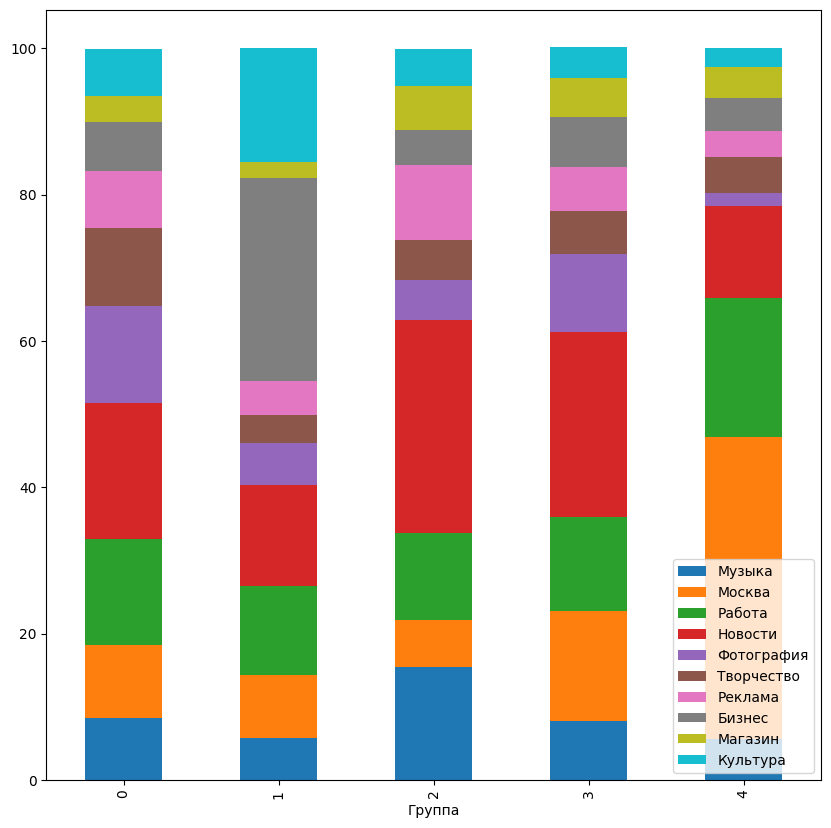

In [231]:
mean_df[["Музыка","Москва","Работа","Новости","Фотография","Творчество","Реклама","Бизнес","Магазин","Культура"]].reset_index().plot.bar(x="Группа",stacked=True,figsize=(10,10))

In [232]:
old_df.loc[old_df["Пол"] == 1,"Пол"]="Женский"
old_df.loc[old_df["Пол"] == 2,"Пол"]="Мужской"

In [233]:
clusters={}
clusters["Новости и реклама"]=old_df[old_df["Группа"] == 0]
clusters["Москва"]=old_df[old_df["Группа"] == 1]
clusters["Музыка"]=old_df[old_df["Группа"] == 2]
clusters["Фотография и творчество"]=old_df[old_df["Группа"] == 3]
clusters["Музыка и Москва"]=old_df[old_df["Группа"] == 4]

# Подбор целевой аудитории

In [2]:
import ipywidgets as widgets

In [234]:
old_df

,Возраст,Подписчики,Общие друзья,Пол,Имя,Фамилия,Алкоголь,Курение,Музыка,Москва,Работа,Новости,Фотография,Творчество,Реклама,Бизнес,Магазин,Культура,Группа
0,31.0,670,12,Мужской,Денис,Бекасов,1.0,1.0,0.0,17.0,12.0,16.0,10.0,0.0,6.0,20.0,6.0,12.0,1
1,0.0,1203,36,Женский,Ирина,Шушакова,3.0,2.0,11.0,4.0,40.0,16.0,4.0,1.0,7.0,1.0,6.0,11.0,0
2,28.0,836,4,Женский,Маша,Сажина,3.0,2.0,0.0,34.0,12.0,16.0,10.0,9.0,9.0,7.0,0.0,3.0,0
3,0.0,657,3,Мужской,Antik,Designer,3.0,2.0,23.0,3.0,13.0,13.0,6.0,11.0,18.0,11.0,3.0,0.0,2
4,0.0,423,1,Мужской,Гайсар,Хафизов,3.0,2.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0.0,2246,1,Мужской,Илья,Дружинин,3.0,2.0,7.0,11.0,16.0,21.0,4.0,0.0,2.0,5.0,6.0,28.0,2
313,30.0,348,1,Мужской,Кирилл,Ласточкин,3.0,2.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,1
314,30.0,743,1,Мужской,Дмитрий,Алдунин,3.0,2.0,3.0,18.0,10.0,28.0,7.0,4.0,12.0,10.0,4.0,3.0,2
315,33.0,2318,1,Женский,Маша,Маринина,3.0,2.0,1.0,28.0,10.0,21.0,1.0,7.0,9.0,14.0,0.0,8.0,0


In [235]:
cluster=widgets.Dropdown(
    options=clusters.keys(),
    value=list(clusters.keys())[0],
    description = "Интересы"
)
vozrast=widgets.Dropdown(
    options=["Любой","Только 18+"],
    value="Любой",
    description = "Возраст"
)
pol=widgets.Dropdown(
    options=["Любой","Мужской","Женский"],
    value="Любой",
    description = "Пол"
)
knopka=widgets.Button(description='Сформировать список id')
def kk(a):
  t=clusters[cluster.value]
  if vozrast.value == "Только 18+":
    t=t[t["Возраст"]>=18]
  if pol.value != "Любой":
    t=t[t["Пол"] == pol.value]
  print(t[["Имя","Фамилия","Возраст","Пол"]])
  print(list(t.index))
  print()
  
knopka.on_click(kk)
m=[cluster,vozrast,pol,knopka]
widgets.VBox(children=m)

         Имя     Фамилия  Возраст      Пол
1      Ирина    Шушакова      0.0  Женский
2       Маша      Сажина     28.0  Женский
5       Юлия  Виграненко      0.0  Женский
6      Елена     Коняева     54.0  Женский
7       Нина       Нгуен     29.0  Женский
..       ...         ...      ...      ...
303     Катя  Терентьева     27.0  Женский
305    Лилия  Зиганурова      0.0  Женский
309     Женя      Басася      0.0  Женский
315     Маша    Маринина     33.0  Женский
316  Наталия   Назаренко      0.0  Женский

[105 rows x 4 columns]
[1, 2, 5, 6, 7, 10, 11, 14, 15, 17, 19, 21, 22, 24, 25, 30, 31, 32, 34, 35, 37, 38, 40, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 56, 66, 68, 69, 71, 78, 79, 83, 89, 97, 104, 108, 109, 113, 115, 117, 118, 124, 141, 149, 151, 155, 156, 157, 158, 159, 161, 168, 174, 178, 181, 182, 183, 184, 190, 191, 193, 194, 196, 205, 207, 211, 215, 219, 226, 229, 231, 233, 235, 237, 240, 241, 242, 245, 256, 264, 277, 282, 287, 288, 291, 292, 293, 294, 296, 299, 300, 303, 30